Vil visualisere hierarkisk modell

In [35]:
from sympy import *
from sympy import 
from sympy import stats

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

Vil finne pdfene fra de innebygde RV

$$
Y\sim bernoulli(p)
$$
$$
X|Y \sim poisson(\lambda)
$$

In [27]:
y,x, p, N, λ = symbols('y x p N λ', positive=True)


Y = stats.Bernoulli('Y', p)
Y_pmf = stats.density(Y).pmf(y)

X_cond_pmf = stats.density(stats.Poisson('X',λ)).pdf(x)

Ble litt komplisert med disse diskret funksjonene... prøver å gjøre alt kontinuerlig slik at jeg kan integrere shit

$$
Y\sim N(\mu_y, \sigma_y^2)
$$
$$
X|Y \sim N(\mu_{x|y},\sigma_{x|y}^2)
$$

Synes det der ble litt slitsomt også jeg... tror jeg nøyer meg med å plotte mixture fordeling med simulerte verdier..

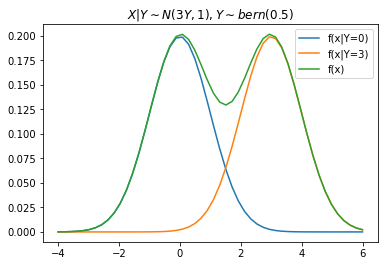

In [97]:
x = symbols('x')
p = 1/2
pdf_0 = (1-p)*stats.density(stats.Normal('X',0,1)).pdf(x)
pdf_1 = p*stats.density(stats.Normal('X',3,1)).pdf(x)
pdf_x = pdf_0+pdf_1

# lambda functions for plotting
lam_pdf_0 = Lambda(x,pdf_0)
lam_pdf_1 = Lambda(x,pdf_1)
lam_pdf_x = Lambda(x,pdf_x)

fig, ax = plt.subplots()
x_grid = np.linspace(-4,6)
ax.plot(x_grid, [float(lam_pdf_0(v).evalf()) for v in x_grid],label='f(x|Y=0)')
ax.plot(x_grid, [float(lam_pdf_1(v).evalf()) for v in x_grid],label='f(x|Y=3)')
ax.plot(x_grid, [float(lam_pdf_x(v).evalf()) for v in x_grid],label='f(x)')
ax.legend()
ax.set_title(r'$X|Y \sim N(3Y,1), Y\sim bern(0.5)$')
fig.savefig('mixture.pdf')

De greiene der var ganske pointless; hvis vi bare vil ha tall og ikke symbolsk expression så er det like greit å bruke scipy på grid

\begin{align}
&Y \sim bern(p)\\
& X|Y=y \sim N(3y,1) \\
& f_X(x) = \sum_y f(x|y)f(y)
\end{align}


prøver å gjøre dette analytisk

In [60]:
x, p = symbols('x p')
pdf_0 = (1-p)*stats.density(stats.Normal('X',0,1)).pdf(x)
pdf_1 = p*stats.density(stats.Normal('X',3,1)).pdf(x)


pdf_x = pdf_0+pdf_1


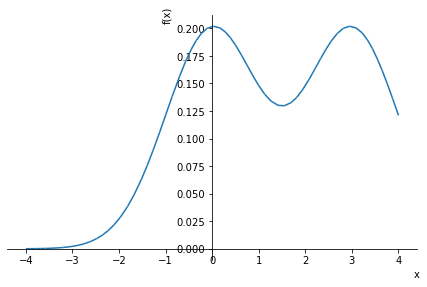

In [62]:
plot(pdf_x.subs(p,(1/2)),(x,-4,4))